In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r'C:\Users\Usha Bharati\Downloads\02-2024 Instacart Basket Analysis'

In [3]:
df_all_merged=pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_all_merged.pkl'))

In [4]:
df_all_merged.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,frequency_flag,surname,Gender,state,Age,join_date,count_of_dependants,family_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Frequent customer,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Frequent customer,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Frequent customer,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both


<Axes: ylabel='Frequency'>

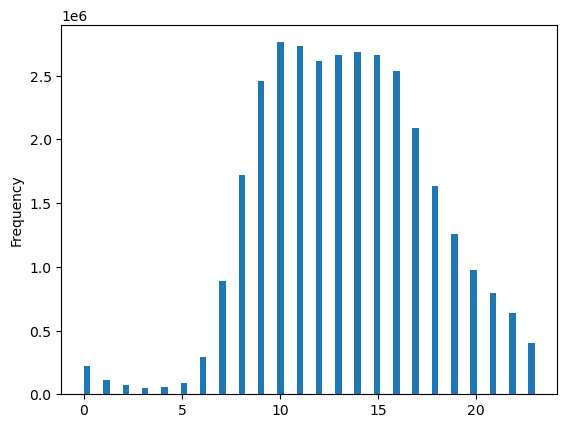

In [5]:
df_all_merged['order_hour_of_day'].plot.hist(bins = 70)

In [6]:
df_all_merged['order_hour_of_day'].describe()

count    3.240486e+07
mean     1.342515e+01
std      4.246380e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

# Histogram demonstrates that --Least orders are received between 0 to 6am. --Highest number of orders are placed between 10am to 3pm. --After 6pm, orders start decreasing for the day.

# Q4 Create a bar chart from the “loyalty_flag” column.

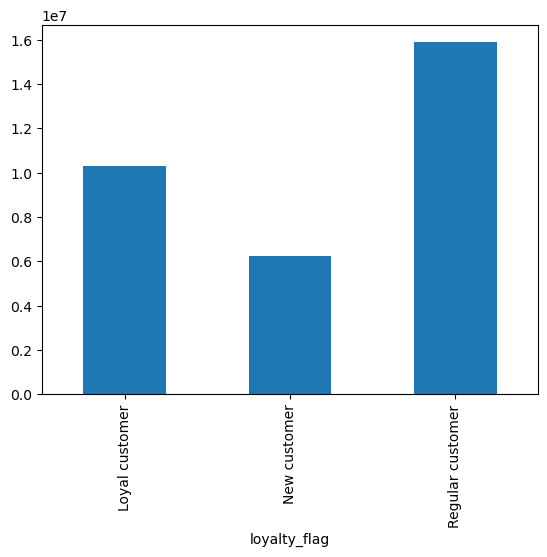

In [27]:
bar_loyalty_flag=df_all_merged['loyalty_flag'].value_counts().sort_index().plot.bar()

# Saving the bar_loyalty_flag plot as png.

In [28]:
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

# Q5 Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day

# Dividing the dataframe to 70:30 using random.rand function with seed 4.

In [9]:
np.random.seed(4)
dev_1 = np.random.rand(len(df_all_merged)) <= 0.7

In [10]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [12]:
big = df_all_merged[dev_1]

In [14]:
small = df_all_merged[~dev_1]

In [15]:
len(df_all_merged)

32404859

In [16]:
len(big)+len(small)

32404859

In [17]:
df_3 = small[['order_hour_of_day','prices']]

C:\Users\Usha Bharati\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usha Bharati\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


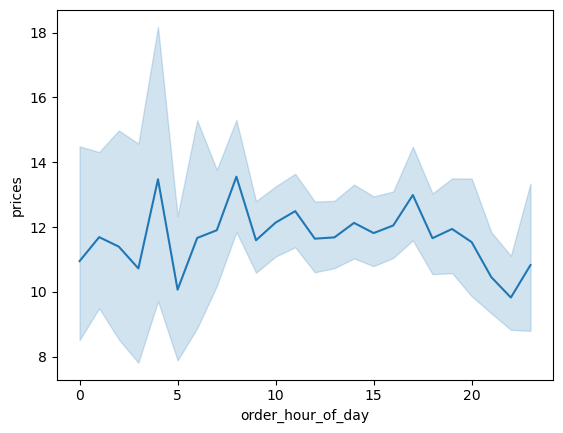

In [19]:
line_expenditure = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

# Saving the line_expenditure plot as png.

In [29]:
line_expenditure.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_expenditure.png'))

In [20]:
df_4=small[['Age','count_of_dependants']]

C:\Users\Usha Bharati\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usha Bharati\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


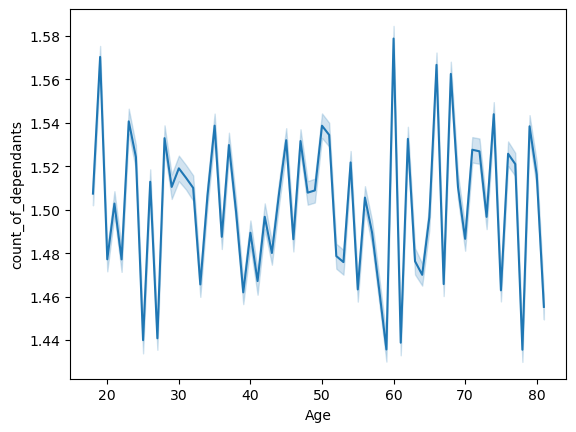

In [21]:
line_dependents= sns.lineplot(data = df_4, x = 'Age',y = 'count_of_dependants')

# There is no connection between age and number of dependents.

# Saving the line_dependents plot as png.

In [30]:
line_dependents.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_dependents.png'))

# Q7- Finding correlation between age and spending power (income) using scatterplot.

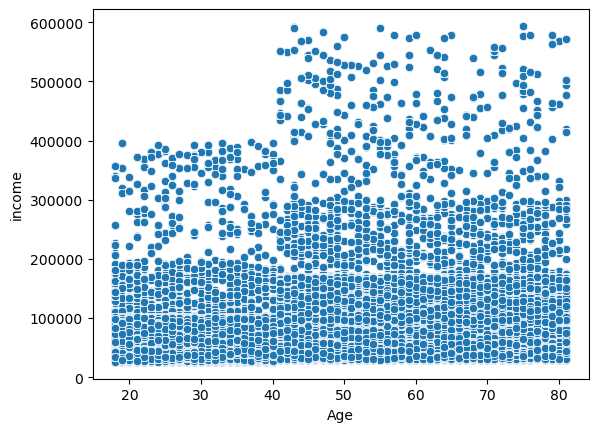

In [31]:
scatterplot_age_income=sns.scatterplot(x = 'Age', y = 'income',data =  df_all_merged)

 # The scatterplot reveals high distribution of income within  $0-$200,000 range for all age groups. Subsequently, the following prominent income bracket is observed between $200,000 and $300,000. Income values ranging from $200,000 to $400,000 are evident across all age ranges. There are also age groups from 40 to 80 within bracket of $400,000 -$600,000.

# Saving the scatterplot as png

In [32]:
  scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_age_income.png'))